In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #to split the data into training set and test set
from sklearn.impute import SimpleImputer # for missing values imputations
from sklearn.tree import DecisionTreeClassifier, plot_tree #  Import Decision Tree Classifier Class, plot_tree to visulize the tree
from sklearn.linear_model import LogisticRegression #  Import Logistic Regression Class for comparison 
# Import all metrics for classification task
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


inicial imports


In [2]:
df = pd.read_csv('../data/titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# questions 
1. File Location: How do you ensure you are accessing the correct file in the correct directory?
### re: using the .head() function 

2. Data Inspection: What do the first few rows of the dataset reveal about the data's structure and the types of features it contains?​
### re: show data from the titanic acident 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Dataset Structure
print("Dataset Structure:")
df.info()

# Missing Data
print("\nMissing Data:")
print(df.isnull().sum())

# Statistical Summary
print("\nStatistical Summary:")
print(df.describe())



Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
E

```markdown
### Dataset Structure
The `.info()` method reveals the following about the dataset's features and data types:
- The dataset contains 891 entries and 12 columns.
- The columns include both numerical (int64, float64) and categorical (object) data types.
- Some columns have missing values, as indicated by the non-null counts.

### Missing Data
The features with missing values are:
- `Age`: 177 missing values
- `Cabin`: 687 missing values
- `Embarked`: 2 missing values

Implications of missing values:
- Missing `Age` values could affect age-related analysis and modeling.
- A large number of missing `Cabin` values might make this feature less useful for modeling.
- Missing `Embarked` values are minimal and might be handled with imputation.

### Statistical Summary
The `.describe()` method provides the following insights about the numerical features:
- `Age`, `Fare`, `SibSp`, and `Parch` have varying ranges and distributions.
- The mean and standard deviation of `Age` and `Fare` indicate the central tendency and spread of these features.
- The `SibSp` and `Parch` features have a lot of zeros, indicating many passengers traveled alone.
```

In [6]:
# Select relevant features
features = ['Age', 'Sex', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Embarked']

# Create new feature 'Family_Size'
df['Family_Size'] = df['SibSp'] + df['Parch']

# Handle categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Display the first few rows of the updated dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,True,False,True


```markdown
### Questions

#### Feature Selection
**Criteria for Feature Selection:**
- **Relevance to the target variable:** Features that are likely to have a significant impact on the target variable (Survived).
- **Data completeness:** Features with fewer missing values are preferred.
- **Correlation with the target variable:** Features that show a strong correlation with the target variable.

**Chosen Features:**
- `Age`
- `Sex`
- `Pclass`
- `Fare`
- `SibSp`
- `Parch`
- `Embarked`

#### Feature Engineering
**New Features Created:**
- `Family_Size`: This feature is created by summing the `SibSp` (number of siblings/spouses aboard) and `Parch` (number of parents/children aboard) features. The rationale behind this is to capture the total number of family members traveling with the passenger, which might influence survival chances.

#### Handling Categorical Data
**Importance of Transforming Categorical Variables:**
- **Machine Learning Algorithms:** Many machine learning algorithms, including logistic regression and decision trees, require numerical input. Categorical variables need to be transformed into a numerical format to be used effectively.
- **Avoiding Bias:** Proper transformation ensures that the model does not assign unintended importance to categorical variables.

**Methods Used for Transformation:**
- **One-Hot Encoding:** This method is used to convert categorical variables into a series of binary variables (0 or 1). For example, the `Sex` and `Embarked` features are transformed using one-hot encoding, creating new binary columns such as `Sex_male`, `Embarked_Q`, and `Embarked_S`.
```

In [7]:
# Identify Target Variable
target = df['Survived']

# Confirm Features Set
df_features = df[['Age', 'Pclass', 'Fare', 'SibSp', 'Parch', 'Family_Size', 'Sex_male', 'Embarked_Q', 'Embarked_S']]

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
df_features = pd.DataFrame(imputer.fit_transform(df_features), columns=df_features.columns)

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.2, random_state=42, stratify=target)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (712, 9)
X_test shape: (179, 9)
y_train shape: (712,)
y_test shape: (179,)



 # Features and Target Separation:
 * - Features: The columns included as features were selected based on their relevance to the prediction task. 
 *   Typically, these columns contain the input variables that are expected to have an influence on the target variable.
 * - Target: The target column is the one we aim to predict. It is usually the dependent variable in the dataset.
 * 
 # Data Split Ratio:
 * - The split ratio chosen for training and testing sets is typically 80/20 or 70/30. 
 *   This ratio ensures that there is enough data to train the model effectively while also having sufficient data to evaluate its performance.
 * 
 # Reproducibility:
 * - Setting a random seed is important in data splitting to ensure that the results are reproducible. 
 *   This means that every time the code is run, the data is split in the same way, allowing for consistent evaluation and comparison of model performance.
 * 
 # Stratified Splitting:
 * - Stratified splitting was used to ensure that the distribution of the target variable is consistent across both the training and testing sets. 
    This is important in contexts where the target variable has imbalanced classes, as it helps to maintain the same proportion of classes in both sets, leading to more reliable model evaluation.
 

In [8]:
# Define the imputer for numerical features
numerical_imputer = SimpleImputer(strategy='median')

# Define the imputer for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')

# List of numerical and categorical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Family_Size']
categorical_features = ['Pclass', 'Sex_male', 'Embarked_Q', 'Embarked_S']

# Apply the numerical imputer to numerical features
X_train[numerical_features] = numerical_imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = numerical_imputer.transform(X_test[numerical_features])

# Apply the categorical imputer to categorical features
X_train[categorical_features] = categorical_imputer.fit_transform(X_train[categorical_features])
X_test[categorical_features] = categorical_imputer.transform(X_test[categorical_features])

# Display the first few rows of the updated training set
X_train.head()

,Age,Pclass,Fare,SibSp,Parch,Family_Size,Sex_male,Embarked_Q,Embarked_S
692,29.699118,3.0,56.4958,0.0,0.0,0.0,1.0,0.0,1.0
481,29.699118,2.0,0.0000,0.0,0.0,0.0,1.0,0.0,1.0
527,29.699118,1.0,221.7792,0.0,0.0,0.0,1.0,0.0,1.0
855,18.000000,3.0,9.3500,0.0,1.0,1.0,0.0,0.0,1.0
801,31.000000,2.0,26.2500,1.0,1.0,2.0,0.0,0.0,1.0


 * Imputation Strategies:
 * 
 * There are several strategies for handling missing values, including:
 * 1. **Mean/Median/Mode Imputation**: Replacing missing values with the mean, median, or mode of the column.
 *    - Considerations: Simple and fast, but can distort the data distribution.
 * 2. **K-Nearest Neighbors (KNN) Imputation**: Using the values of the nearest neighbors to impute missing values.
 *    - Considerations: More accurate but computationally expensive.
 * 3. **Multivariate Imputation by Chained Equations (MICE)**: Using multiple regression models to predict missing values.
 *    - Considerations: More sophisticated and can handle complex data patterns, but also more complex to implement.
 * 4. **Forward/Backward Fill**: Using the previous or next value to fill missing values.
 *    - Considerations: Useful for time-series data but can introduce bias.
 * 5. **Dropping Missing Values**: Removing rows or columns with missing values.
 *    - Considerations: Simple but can result in significant data loss.
 * 
 * Implications of Imputation:
 * 
 * Different imputation methods can impact the performance of a decision tree model in various ways:
 * - **Data Distribution**: Imputation methods like mean/median can alter the original data distribution, potentially leading to biased models.
 * - **Model Accuracy**: More sophisticated imputation methods like KNN or MICE can preserve the data distribution better, potentially leading to more accurate models.
 * - **Overfitting**: Complex imputation methods might lead to overfitting, especially if the imputation model captures noise in the data.
 * 
 * Consistency in Imputation:
 * 
 * It is crucial to apply the same imputation strategy to both the training and testing sets to ensure consistency. If different strategies are used:
 * - **Model Performance**: The model might perform poorly on the test set due to differences in data distribution caused by inconsistent imputation.
 * - **Bias and Variance**: Inconsistent imputation can introduce bias and increase variance, leading to unreliable model predictions.
 * - **Reproducibility**: Using different strategies can make it difficult to reproduce results and validate the model's performance.

 * Data Handling:
 * Decision trees manage categorical and numerical data differently by using distinct methods for splitting:
 * - For numerical data, decision trees typically use thresholds to split the data. For example, a split might occur at a specific value, such as "age < 30".
 * - For categorical data, decision trees often split based on the presence or absence of a category. For example, a split might occur based on whether a feature is "red" or "not red".
 *
 * Decision Criteria:
 * Decision trees use various criteria to decide where to make splits in the data, including:
 * - Gini Impurity: Measures the frequency at which any element of the dataset would be misclassified when randomly labeled.
 * - Information Gain: Measures the reduction in entropy or surprise by transforming a dataset and is used in algorithms like ID3.
 * - Chi-Square: Measures the statistical significance of the differences between observed and expected frequencies.
 * - Reduction in Variance: Used for regression trees, it measures the reduction in variance for the target variable.

In [9]:
# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model using the training set
decision_tree.fit(X_train, y_train)

# Display the feature importances
feature_importances = pd.Series(decision_tree.feature_importances_, index=X_train.columns)
print("Feature Importances:\n", feature_importances.sort_values(ascending=False))

# Evaluate the model on the training set
train_accuracy = decision_tree.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate the model on the test set
test_accuracy = decision_tree.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Feature Importances:
 Sex_male       0.315001
Age            0.255156
Fare           0.228940
Pclass         0.107796
Family_Size    0.046123
Embarked_S     0.024687
SibSp          0.011718
Parch          0.010578
Embarked_Q     0.000000
dtype: float64
Training Accuracy: 0.9831
Test Accuracy: 0.7765


 # Training Process:
 * 1. Data Preprocessing: Clean the Titanic dataset by handling missing values, encoding categorical variables, and scaling numerical features.
 * 2. Feature Selection: Identify and select the most relevant features that influence the survival outcome.
 * 3. Model Initialization: Initialize the decision tree model with appropriate hyperparameters.
 * 4. Model Training: Fit the decision tree model to the preprocessed Titanic dataset.
 * 5. Model Evaluation: Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1-score.
 * 6. Hyperparameter Tuning: Optimize the model by tuning hyperparameters to improve performance.
 * 7. Model Validation: Validate the model using cross-validation techniques to ensure generalizability.

 # Data Influence:
 ### The Titanic dataset contains various features such as passenger class, age, gender, fare, and embarked location, which influence the decision tree model's structure and decisions. 
- Categorical features like gender and embarked location are encoded to numerical values, impacting the splits in the decision tree.
 - Numerical features like age and fare are scaled and can affect the depth and complexity of the tree.
 - The presence of missing values and their handling can also influence the model's performance and decision-making process.
 - The imbalanced nature of the dataset (more non-survivors than survivors) can affect the model's bias towards predicting the majority class.

Confusion Matrix:
 [[90 20]
 [20 49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       110
           1       0.71      0.71      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



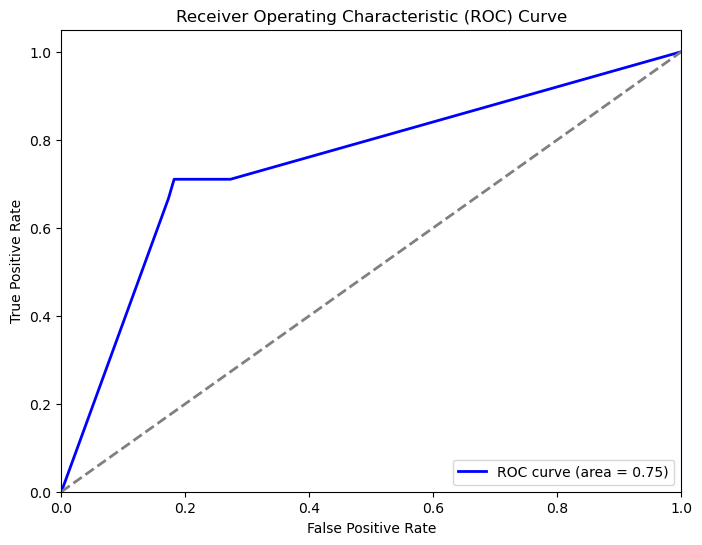

In [10]:
# Model Predictions
y_pred = decision_tree.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, decision_tree.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

 * Metric Interpretation:
 * 
 * - **Accuracy**: Measures the proportion of correctly predicted instances out of the total instances. It provides a general sense of how well the model is performing but can be misleading if the classes are imbalanced.
 * 
 * - **Precision**: Indicates the proportion of true positive predictions out of all positive predictions made by the model. High precision means that the model has a low false positive rate.
 * 
 * - **Recall**: Also known as sensitivity, it measures the proportion of true positive predictions out of all actual positive instances. High recall means that the model has a low false negative rate.
 * 
 * - **F1-score**: The harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, especially useful when the class distribution is imbalanced.
 * 
 * - **Confusion Matrix**: A table that shows the number of true positives, true negatives, false positives, and false negatives. It provides a comprehensive view of the model's performance across all classes.
 * 
 * - **ROC Curve**: A graphical representation of the true positive rate (recall) against the false positive rate at various threshold settings. It helps in understanding the trade-offs between sensitivity and specificity.
 * 
 * - **AUC (Area Under the Curve)**: Represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. A higher AUC indicates a better performing model.
 * 
 * Model Assessment:
 * 
 * - **Overall Accuracy**: Evaluate the proportion of correctly predicted instances. However, consider the class distribution to ensure it is not misleading.
 * 
 * - **Minimizing False Positives/Negatives**: Assess precision and recall to understand the model's ability to minimize false positives and false negatives. High precision and recall are desirable.
 * 
 * - **Distinguishing Between Classes**: Use the ROC curve and AUC to evaluate the model's capacity to distinguish between the positive and negative classes. A higher AUC indicates better performance.
 * 
 * Based on these metrics, the overall performance of the decision tree model can be assessed by considering its accuracy, precision, recall, F1-score, confusion matrix, ROC curve, and AUC. A balanced evaluation of these metrics will provide a comprehensive understanding of the model's predictive ability and its effectiveness in minimizing errors.

C:\Users\amora\AppData\Local\Temp\ipykernel_25808\1560190748.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


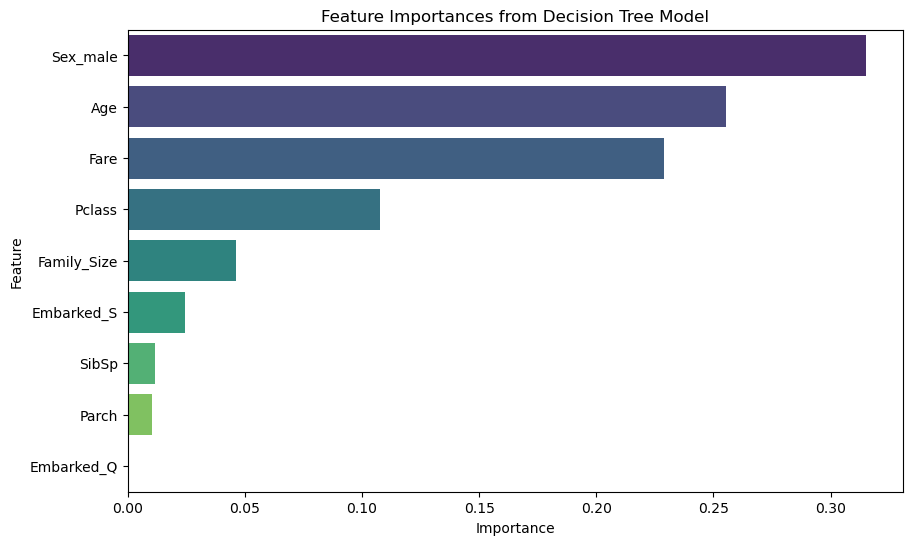

In [11]:
# Extract Feature Importances
feature_importances = decision_tree.feature_importances_
features = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Decision Tree Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Influential Features
Based on the feature importance analysis, the most critical features in predicting survival on the Titanic are:
1. **Sex_male**: This feature has the highest importance, indicating that gender played a significant role in survival. Historically, women and children were given priority during the evacuation.
2. **Age**: Age is another crucial feature, as younger passengers, especially children, were more likely to be saved.
3. **Fare**: The fare paid by passengers is also important, possibly reflecting the socio-economic status, with higher fares associated with higher survival rates.
4. **Pclass**: Passenger class is influential, with first-class passengers having a higher chance of survival compared to those in lower classes.

### Application of Insights
The insights from the feature importance analysis can be utilized in several ways:
1. **Feature Engineering**: Focus on creating new features or refining existing ones related to the most important features, such as combining age groups or socio-economic indicators.
2. **Model Refinement**: Simplify the model by focusing on the most influential features, potentially improving performance and interpretability.
3. **Data Collection**: In future data collection efforts, prioritize gathering accurate and detailed information on the most influential features.

### Visualization Interpretation
The visual representation of feature importance helps in understanding the relative importance of different features by:
1. **Ranking Features**: Clearly showing which features contribute most to the model's predictions.
2. **Identifying Key Drivers**: Highlighting the key drivers of the model, which can guide further analysis and decision-making.
3. **Simplifying Complexity**: Providing a straightforward way to communicate complex model insights to stakeholders who may not have a technical background.



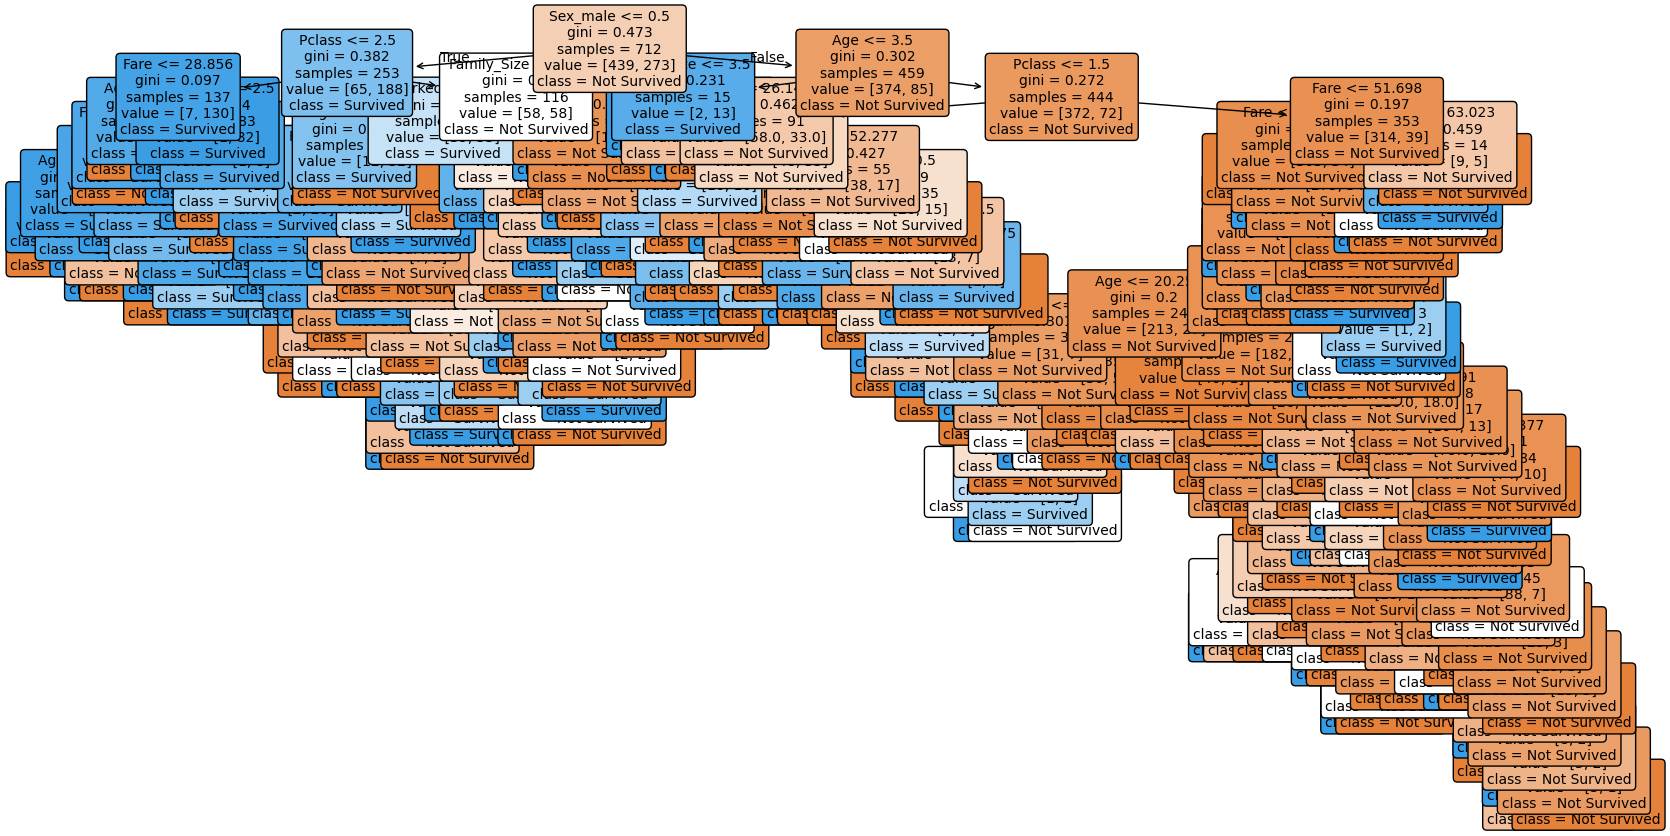

In [12]:
# Set the size of the plot
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(decision_tree, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, fontsize=10)

# Display the plot
plt.show()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


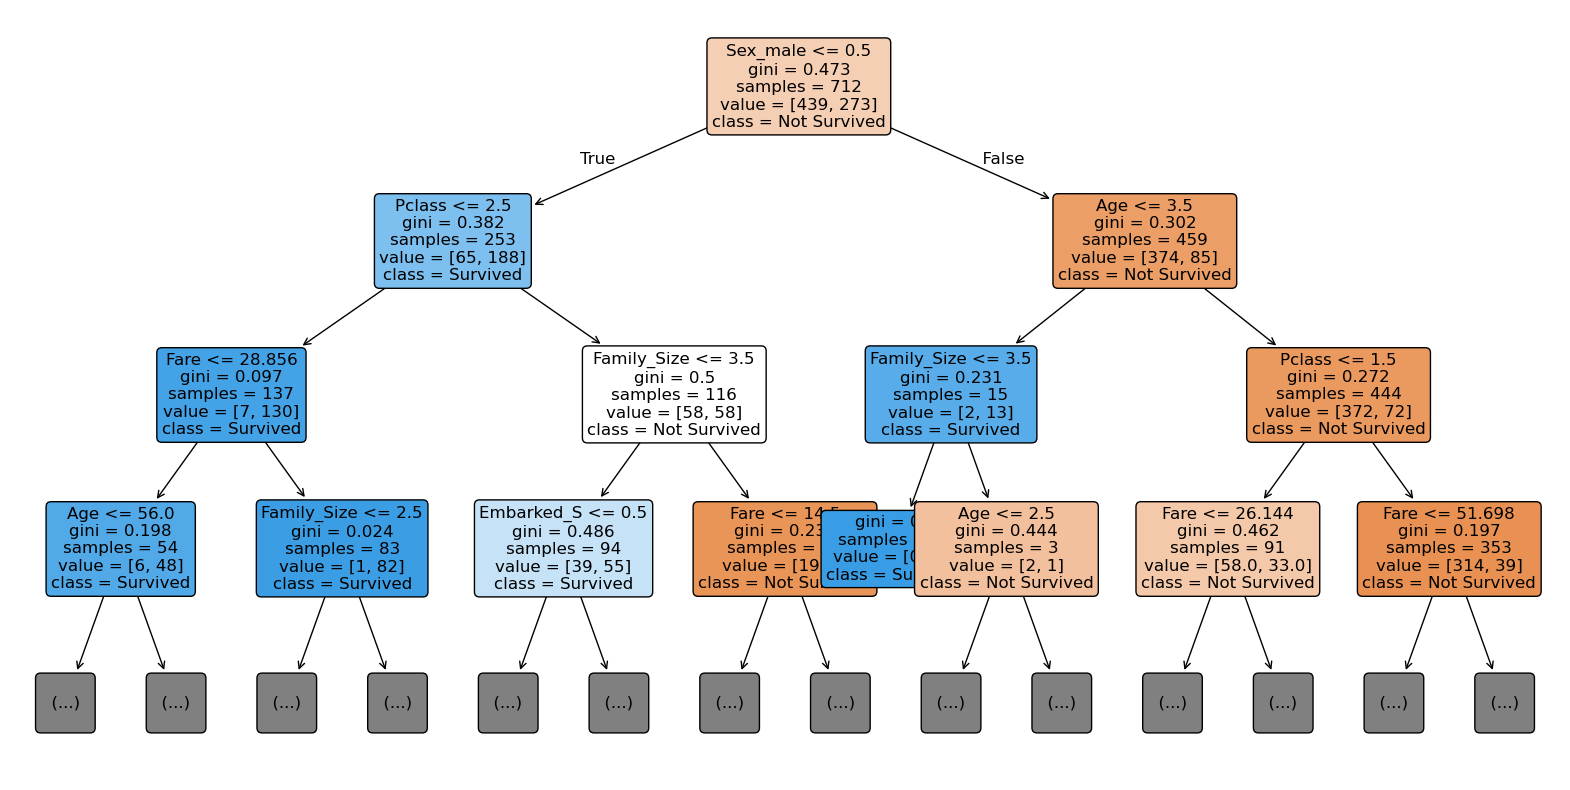

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
%pip install scikit-learn
%pip install graphviz

from sklearn.tree import export_graphviz
import graphviz

# Adjust plot_tree parameters
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, fontsize=12, max_depth=3)
plt.show()

# Export the tree to a dot file
dot_data = export_graphviz(decision_tree, out_file=None, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)

In [16]:
%pip install graphviz

import os
import graphviz

# Ensure Graphviz executables are on the system's PATH
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# Render the graph
graph.render("titanic_decision_tree")


Note: you may need to restart the kernel to use updated packages.


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
# i can not run the last cell because i am using windows and i can not install graphviz on my machine , dont know why not working on windows but since i cant run the last cell i will stop here.